# Lens parameter distributions

* This notebook shows example how to use the `LensGalaxyParameterDistribution` class to create a distribution of lens galaxy parameters.

* You can change model or model parameters and compare the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ler.lens_galaxy_population import LensGalaxyParameterDistribution

Setting multiprocessing start method to 'fork'


In [2]:
lens1 = LensGalaxyParameterDistribution(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    cosmology=None,
    event_type="BBH",
    CBCSourceParameterDistribution_=False,
    lens_type="epl_shear_galaxy",
    lens_functions = dict(
            cross_section_based_sampler="rejection_sampling_with_cross_section",
            optical_depth="optical_depth_epl_shear_hemanta",
        ),
    lens_param_samplers=dict(
            velocity_dispersion="velocity_dispersion_ewoud",
            axis_ratio="axis_ratio_rayleigh",
        ),
    lens_param_samplers_params=dict(
            velocity_dispersion=dict(vd_min=50., vd_max=420.),
            axis_ratio=dict(q_min=0.2, q_max=1.),
        ),
    directory="./interpolator_json",
    #create_new_interpolator=True,
)


Initializing LensGalaxyParameterDistribution class...


Initializing CBCSourceParameterDistribution...


Initializing CBCSourceRedshiftDistribution...

z_to_luminosity_distance interpolator will be loaded from ./interpolator_json/z_to_luminosity_distance/z_to_luminosity_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_1.pickle
merger_rate_density interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_0.pickle

Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differentia

optical_depth_epl_shear_hemanta interpolator will be loaded from ./interpolator_json/optical_depth/optical_depth_epl_shear_hemanta_0.pickle


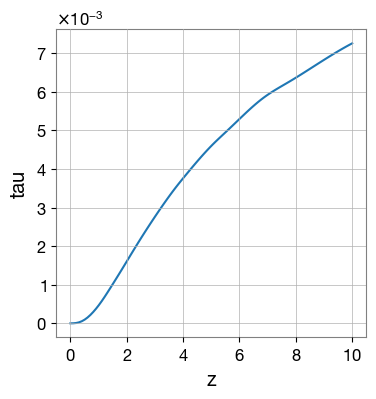

In [8]:
zs = np.linspace(0.0, 10, 100)
tau = lens1.strong_lensing_optical_depth(zs)
plt.figure(figsize=(4, 4))
plt.plot(zs, tau)
plt.xlabel("z")
plt.ylabel("tau")
plt.show()

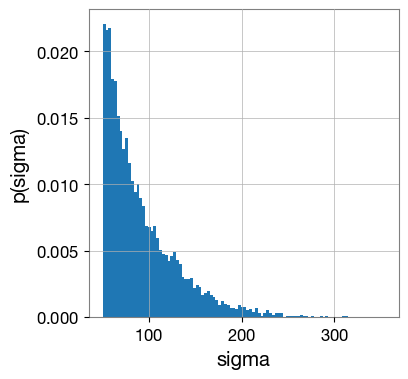

In [11]:
sigma = lens1.sample_velocity_dispersion(10000, np.ones(10000))
plt.figure(figsize=(4, 4))
plt.hist(sigma, bins=100, density=True)
plt.xlabel("sigma")
plt.ylabel("p(sigma)")
plt.show()

In [4]:
lens_params1 = lens1.sample_lens_parameters(10000)
# size=10000, 1m 26.0s

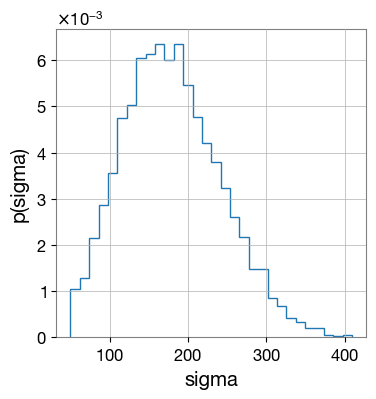

In [5]:
sigma = test["sigma"]

plt.figure(figsize=(4, 4))
plt.hist(sigma, bins=30, density=True, histtype="step")
plt.xlabel("sigma")
plt.ylabel("p(sigma)")
plt.show()

In [6]:
lens_params1 = test

## Model 1

### SIE model on optical depth

* redshift dependent velocity dispersion

* rejection sampled with SIE cross section

* But the lens parameters are still EPL+Shear

In [2]:
lens1 = LensGalaxyParameterDistribution(
    npool=4,
    z_min=0.001,
    z_max=10.0,
    cosmology=None,
    event_type="BBH",
    CBCSourceParameterDistribution_=False,
    lens_type="epl_galaxy",
    lens_functions = dict(
            cross_section_based_sampler="rejection_sampling_with_cross_section_SIE",
            optical_depth="SIE",
        ),
    lens_param_samplers=dict(
            velocity_dispersion="velocity_dispersion_ewoud",
            axis_ratio="axis_ratio_rayleigh",
        ),
    lens_param_samplers_params=dict(
            velocity_dispersion=dict(vd_min=0., vd_max=600.),
            axis_ratio=dict(q_min=0.2, q_max=1.),
        ),
    directory="./interpolator_json",
    #create_new_interpolator=True,
)

z_to_luminosity_distance interpolator will be loaded from ./interpolator_json/z_to_luminosity_distance/z_to_luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_0.pickle
merger_rate_density_bbh_oguri2018 interpolator will be loaded from ./interpolator_json/merger_rate_density_bbh_oguri2018/merger_rate_density_bbh_oguri2018_0.pickle
z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_0.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_0.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_0.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_d

In [3]:
# sample all lens parameters and source parameters
lens_params1 = lens1.sample_lens_parameters(25000)

In [7]:
# listing the parameters
lens_params1.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'theta_E', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2'])

In [8]:
# getting the image properrties
lens_params_all1 = lens1.image_properties(lens_params1)

solving lens equations...


100%|███████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 6598.25it/s]


### Redshifts 
* Source redshifts
* Lens redshifts

In [9]:
# lens redshifts
zl1 = lens_params1["zl"]
# source redshifts
zs1 = lens_params1["zs"]
# magnifications
mu1 = abs(np.array(lens_params1["magnifications"]).flatten())
mu_max = 20
mu1 = mu1[mu1<mu_max]
# velocity dispersions
sigma_all1 = lens_params1["sigma"]
# axis ratios
q1 = lens_params1["q"]
# Einstein radii
theta_E1 = lens_params1["theta_E"]

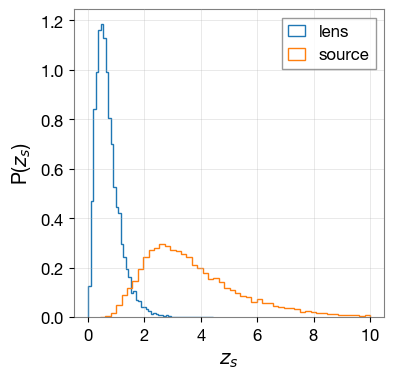

In [10]:
fig = plt.figure(figsize=(4,4))
plt.hist(zl1, bins=50, histtype="step", label="lens", density=True)
plt.hist(zs1, bins=50, histtype="step", label="source", density=True)
plt.legend()
plt.xlabel(r"$z_s$")
plt.ylabel(r"P($z_s$)")
plt.grid(alpha=0.4)
plt.show()


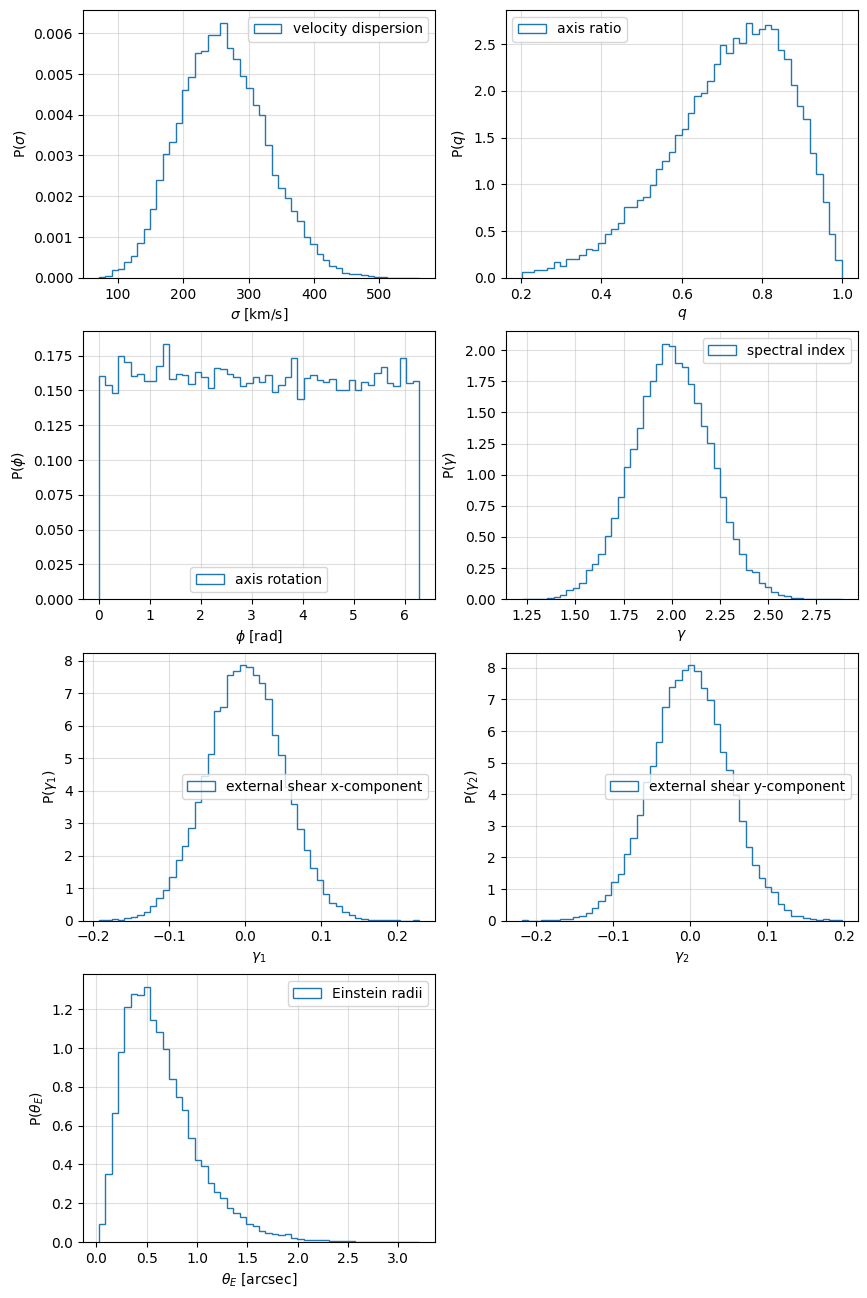

In [8]:
fig = plt.figure(figsize=(10,16))

ax = plt.subplot(421)
# velocity dispersions
sigma = lens_params1["sigma"]
ax.hist(sigma, bins=50, histtype="step", label="velocity dispersion", density=True)
ax.legend()
ax.set_xlabel(r"$\sigma$ [km/s]")
ax.set_ylabel(r"P($\sigma$)")
ax.grid(alpha=0.4)

ax = plt.subplot(422)
# axis ratios
q = lens_params1["q"]
ax.hist(q, bins=50, histtype="step", label="axis ratio", density=True)
ax.legend()
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"P($q$)")
ax.grid(alpha=0.4)

ax = plt.subplot(423)
# axis rotation
phi = lens_params1["phi"]
ax.hist(phi, bins=50, histtype="step", label="axis rotation", density=True)
ax.legend()
ax.set_xlabel(r"$\phi$ [rad]")
ax.set_ylabel(r"P($\phi$)")
ax.grid(alpha=0.4)

ax = plt.subplot(424)
# spectral index
gamma = lens_params1["gamma"]
ax.hist(gamma, bins=50, histtype="step", label="spectral index", density=True)
ax.legend()
ax.set_xlabel(r"$\gamma$")
ax.set_ylabel(r"P($\gamma$)")
ax.grid(alpha=0.4)

ax = plt.subplot(425)
# external shear x-component
gamma1 = lens_params1["gamma1"]
ax.hist(gamma1, bins=50, histtype="step", label="external shear x-component", density=True)
ax.legend()
ax.set_xlabel(r"$\gamma_1$")
ax.set_ylabel(r"P($\gamma_1$)")
ax.grid(alpha=0.4)

ax = plt.subplot(426)
# external shear y-component
gamma2 = lens_params1["gamma2"]
ax.hist(gamma2, bins=50, histtype="step", label="external shear y-component", density=True)
ax.legend()
ax.set_xlabel(r"$\gamma_2$")
ax.set_ylabel(r"P($\gamma_2$)")
ax.grid(alpha=0.4)

ax = plt.subplot(427)
# einstein radii
theta_E = lens_params1["theta_E"]*1e5
ax.hist(theta_E, bins=50, histtype="step", label="Einstein radii", density=True)
ax.legend()
ax.set_xlabel(r"$\theta_E$ [arcsec]")
ax.set_ylabel(r"P($\theta_E$)")
ax.grid(alpha=0.4)

plt.show()

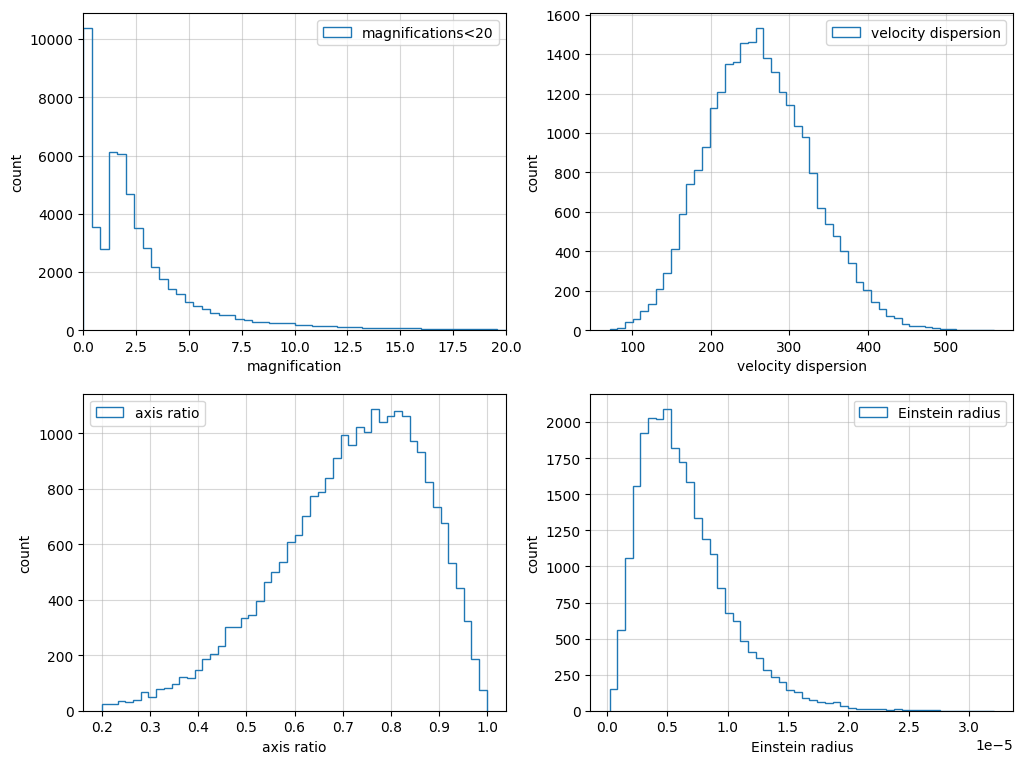

In [9]:
fig = plt.figure(figsize=(12,14))

ax = plt.subplot(321)
ax.hist(mu1, bins=50, histtype="step", label="magnifications<20")
ax.legend()
ax.set_xlabel("magnification")
ax.set_ylabel("count")
ax.set_xlim(0, mu_max)
ax.grid(alpha=0.5)

ax = plt.subplot(322)
ax.hist(sigma_all1, bins=50, histtype="step", label="velocity dispersion")
ax.legend()
ax.set_xlabel("velocity dispersion")
ax.set_ylabel("count")
ax.grid(alpha=0.5)

ax = plt.subplot(323)
ax.hist(q1, bins=50, histtype="step", label="axis ratio")
ax.legend()
ax.set_xlabel("axis ratio")
ax.set_ylabel("count")
ax.grid(alpha=0.5)

ax = plt.subplot(324)
ax.hist(theta_E1, bins=50, histtype="step", label="Einstein radius")
ax.legend()
ax.set_xlabel("Einstein radius")
ax.set_ylabel("count")
ax.grid(alpha=0.5)

plt.show()



## Model 2

### SIS model on optical depth

* redshift independent velocity dispersion (gengamma)

* rejection sampled with SIS cross section

* But the lens parameters are still EPL+Shear

* axis ratio using Padilla and Strauss 2008

In [10]:
lens1.available_lens_functions

{'cross_section_based_sampler': ['rejection_sampling_with_cross_section_SIE',
  'rejection_sampling_with_cross_section_SIS'],
 'optical_depth': ['SIS',
  'optical_depth_sis_analytic',
  'optical_depth_SIS_hemanta',
  'SIE',
  'optical_depth_SIE_hemanta'],
 'param_sampler_type': ['sample_all_routine']}

In [11]:
lens1.available_lens_samplers

{'source_redshift_sl': {'strongly_lensed_source_redshifts': None},
 'lens_redshift': {'lens_redshift_SDSS_catalogue': None},
 'velocity_dispersion': {'velocity_dispersion_haris': {'a': 0.8689138576779026,
   'c': 2.67},
  'velocity_dispersion_gengamma': {'a': 0.8689138576779026, 'c': 2.67},
  'velocity_dispersion_bernardi': None,
  'velocity_dispersion_ewoud': None},
 'axis_ratio': {'axis_ratio_rayleigh': {'q_min': 0.2, 'q_max': 1.0},
  'axis_ratio_padilla_strauss': {'q_min': 0.2, 'q_max': 1.0},
  'axis_ratio_SIS': None},
 'axis_rotation_angle': {'axis_rotation_angle_uniform': {'phi_min': 0.0,
   'phi_max': 6.283185307179586}},
 'external_shear': {'shear_norm': {'scale': 0.05}},
 'density_profile_slope': {'density_profile_slope_normal': {'mean': 2.0,
   'std': 0.2}},
 'source_parameters': {'sample_gw_parameters': None}}

In [12]:
lens2 = LensGalaxyParameterDistribution(
    npool=4,
    z_min=0.001,
    z_max=10.0,
    cosmology=None,
    event_type="BBH",
    CBCSourceParameterDistribution_=False,
    lens_type="epl_galaxy",
    lens_functions=dict(
            cross_section_based_sampler="rejection_sampling_with_cross_section_SIS",
            optical_depth="optical_depth_sis_analytic",
        ),
    lens_param_samplers=dict(
            velocity_dispersion="velocity_dispersion_gengamma",
            axis_ratio="axis_ratio_padilla_strauss",
        ),
    lens_param_samplers_params=dict(
            velocity_dispersion=dict(vd_min=0., vd_max=600.),
            axis_ratio=dict(q_min=0.2, q_max=1.),
        ),
    directory="./interpolator_json",
    create_new_interpolator=True,
)

z_to_luminosity_distance interpolator will be generated at ./interpolator_json/z_to_luminosity_distance/z_to_luminosity_distance_0.pickle
differential_comoving_volume interpolator will be generated at ./interpolator_json/differential_comoving_volume/differential_comoving_volume_0.pickle
merger_rate_density_bbh_oguri2018 interpolator will be generated at ./interpolator_json/merger_rate_density_bbh_oguri2018/merger_rate_density_bbh_oguri2018_0.pickle
z_to_Dc interpolator will be generated at ./interpolator_json/z_to_Dc/z_to_Dc_0.pickle
Dc_to_z interpolator will be generated at ./interpolator_json/Dc_to_z/Dc_to_z_0.pickle
angular_diameter_distance interpolator will be generated at ./interpolator_json/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be generated at ./interpolator_json/differential_comoving_volume/differential_comoving_volume_0.pickle
velocity_dispersion_gengamma interpolator will be generated at ./interpolator_json

In [13]:
lens2.lens_param_samplers

{'source_redshift_sl': 'strongly_lensed_source_redshifts',
 'lens_redshift': 'lens_redshift_SDSS_catalogue',
 'velocity_dispersion': 'velocity_dispersion_gengamma',
 'axis_ratio': 'axis_ratio_padilla_strauss',
 'axis_rotation_angle': 'axis_rotation_angle_uniform',
 'external_shear': 'shear_norm',
 'density_profile_slope': 'density_profile_slope_normal',
 'source_parameters': 'sample_gw_parameters'}

In [14]:
# sample all lens parameters and source parameters
lens_params2 = lens2.sample_lens_parameters(25000)

In [15]:
# getting the image properrties
lens_params_all = lens2.image_properties(lens_params2)

solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:08<00:00, 2938.84it/s]


In [16]:
# lens redshifts
zl2 = lens_params2["zl"]
# source redshifts
zs2 = lens_params2["zs"]
# magnifications
mu2 = abs(np.array(lens_params2["magnifications"]).flatten())
mu_max = 20
mu2 = mu2[mu2<mu_max]
# velocity dispersions
sigma_all2 = lens_params2["sigma"]
# axis ratios
q2 = lens_params2["q"]
# Einstein radii
theta_E2 = lens_params2["theta_E"]

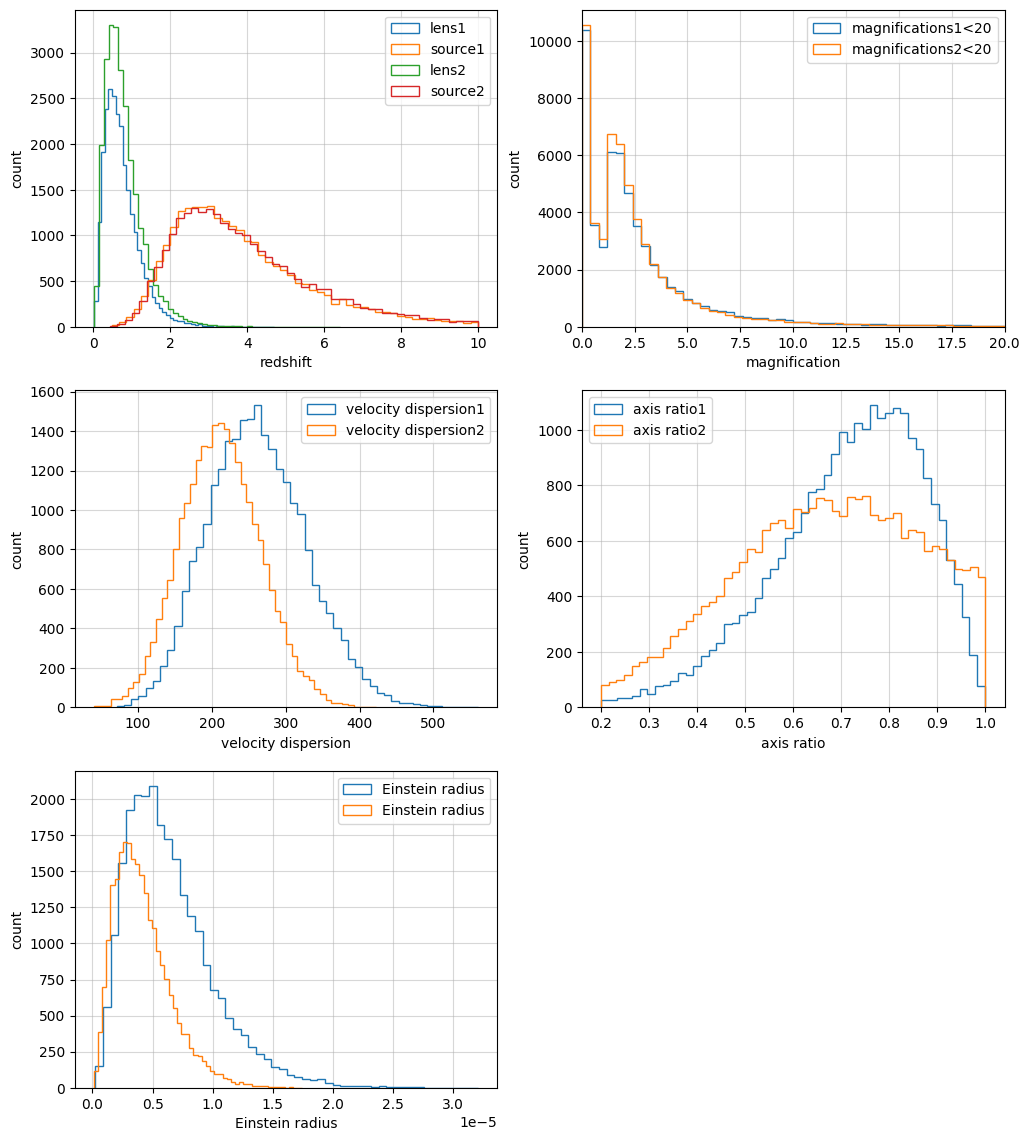

In [17]:
fig = plt.figure(figsize=(12,14))
ax = plt.subplot(321)
ax.hist(zl1, bins=50, histtype="step", label="lens1")
ax.hist(zs1, bins=50, histtype="step", label="source1")
ax.hist(zl2, bins=50, histtype="step", label="lens2")
ax.hist(zs2, bins=50, histtype="step", label="source2")
ax.legend()
ax.set_xlabel("redshift")
ax.set_ylabel("count")
ax.grid(alpha=0.5)

ax = plt.subplot(322)
ax.hist(mu1, bins=50, histtype="step", label="magnifications1<20")
ax.hist(mu2, bins=50, histtype="step", label="magnifications2<20")
ax.legend()
ax.set_xlabel("magnification")
ax.set_ylabel("count")
ax.set_xlim(0, mu_max)
ax.grid(alpha=0.5)

ax = plt.subplot(323)
ax.hist(sigma_all1, bins=50, histtype="step", label="velocity dispersion1")
ax.hist(sigma_all2, bins=50, histtype="step", label="velocity dispersion2")
ax.legend()
ax.set_xlabel("velocity dispersion")
ax.set_ylabel("count")
ax.grid(alpha=0.5)

ax = plt.subplot(324)
ax.hist(q1, bins=50, histtype="step", label="axis ratio1")
ax.hist(q2, bins=50, histtype="step", label="axis ratio2")
ax.legend()
ax.set_xlabel("axis ratio")
ax.set_ylabel("count")
ax.grid(alpha=0.5)

ax = plt.subplot(325)
ax.hist(theta_E1, bins=50, histtype="step", label="Einstein radius")
ax.hist(theta_E2, bins=50, histtype="step", label="Einstein radius")
ax.legend()
ax.set_xlabel("Einstein radius")
ax.set_ylabel("count")
ax.grid(alpha=0.5)

plt.show()